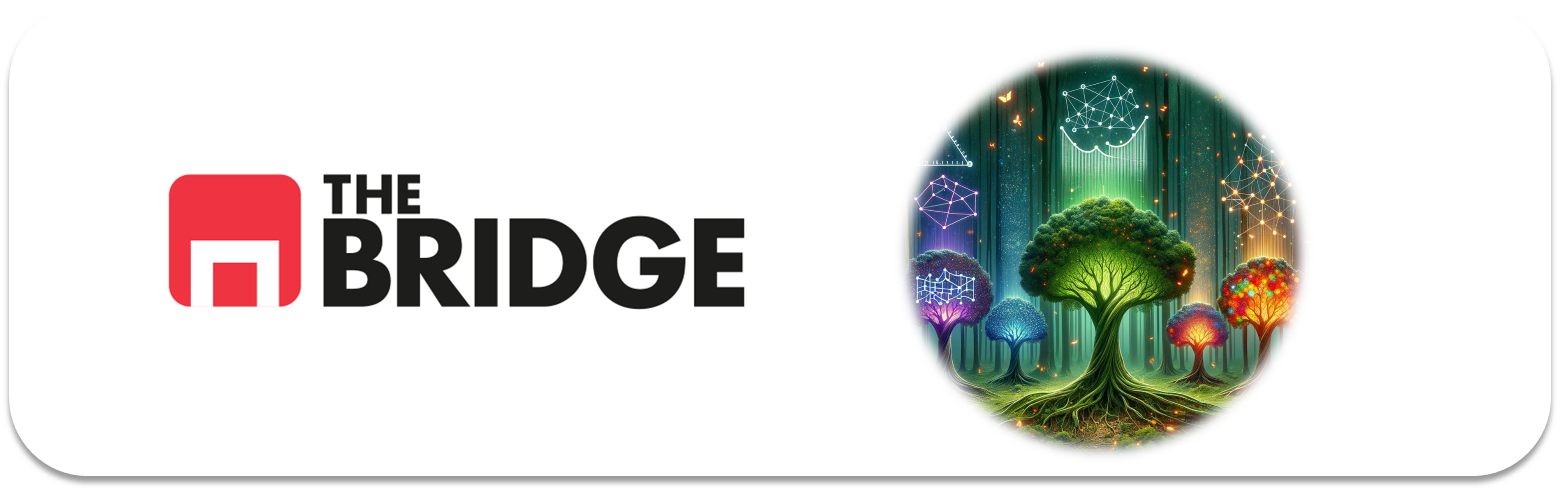

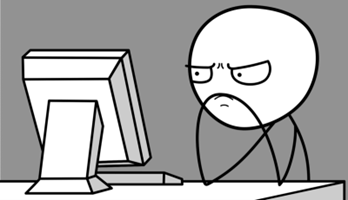

Para ejercitarte y afianzar lo aprendido sobre **Bagging y Boosting**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0.1

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import sklearn

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier


### Ejercicio 0.2

Carga el dataset conocido como Mnist y vuélcalo en un array en numpy. Ejecuta la siguiente celda:

In [4]:
df = pd.read_csv("./data/mnist_csv")
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,numero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [5]:

X = df.drop("numero", axis = 1).values
y = df["numero"].values


### Ejercicio 1

Muestra el contenido del dataset, las primersas 5 filas. Y luego utiliza la función que tienes a continuaicón para mostrar cada instancia de una forma gráfica. Muestra las cinco primeras y el target de las mismas

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mnist_images(images, bck_white = False):
    """
    Función para mostrar imágenes del dataset MNIST.

    :param images: Array de numpy con múltiples imágenes, cada una de 784 elementos.
    """
    # Número de imágenes
    num_images = len(images)

    # Crear una cuadrícula de subplots
    cols = int(np.sqrt(num_images))
    rows = (num_images // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_images:
            # Convertir cada imagen de 784 elementos a un array 2D de 28x28
            img_matrix = images[i].reshape(28, 28)

            # Mostrar la imagen
            ax.imshow(img_matrix, cmap='gray' if not bck_white else "binary" )

            # Quitar los ejes
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()



¿Cuántos pixeles tiene de alto y ancho cada imagen?

Tiene 28 x 28

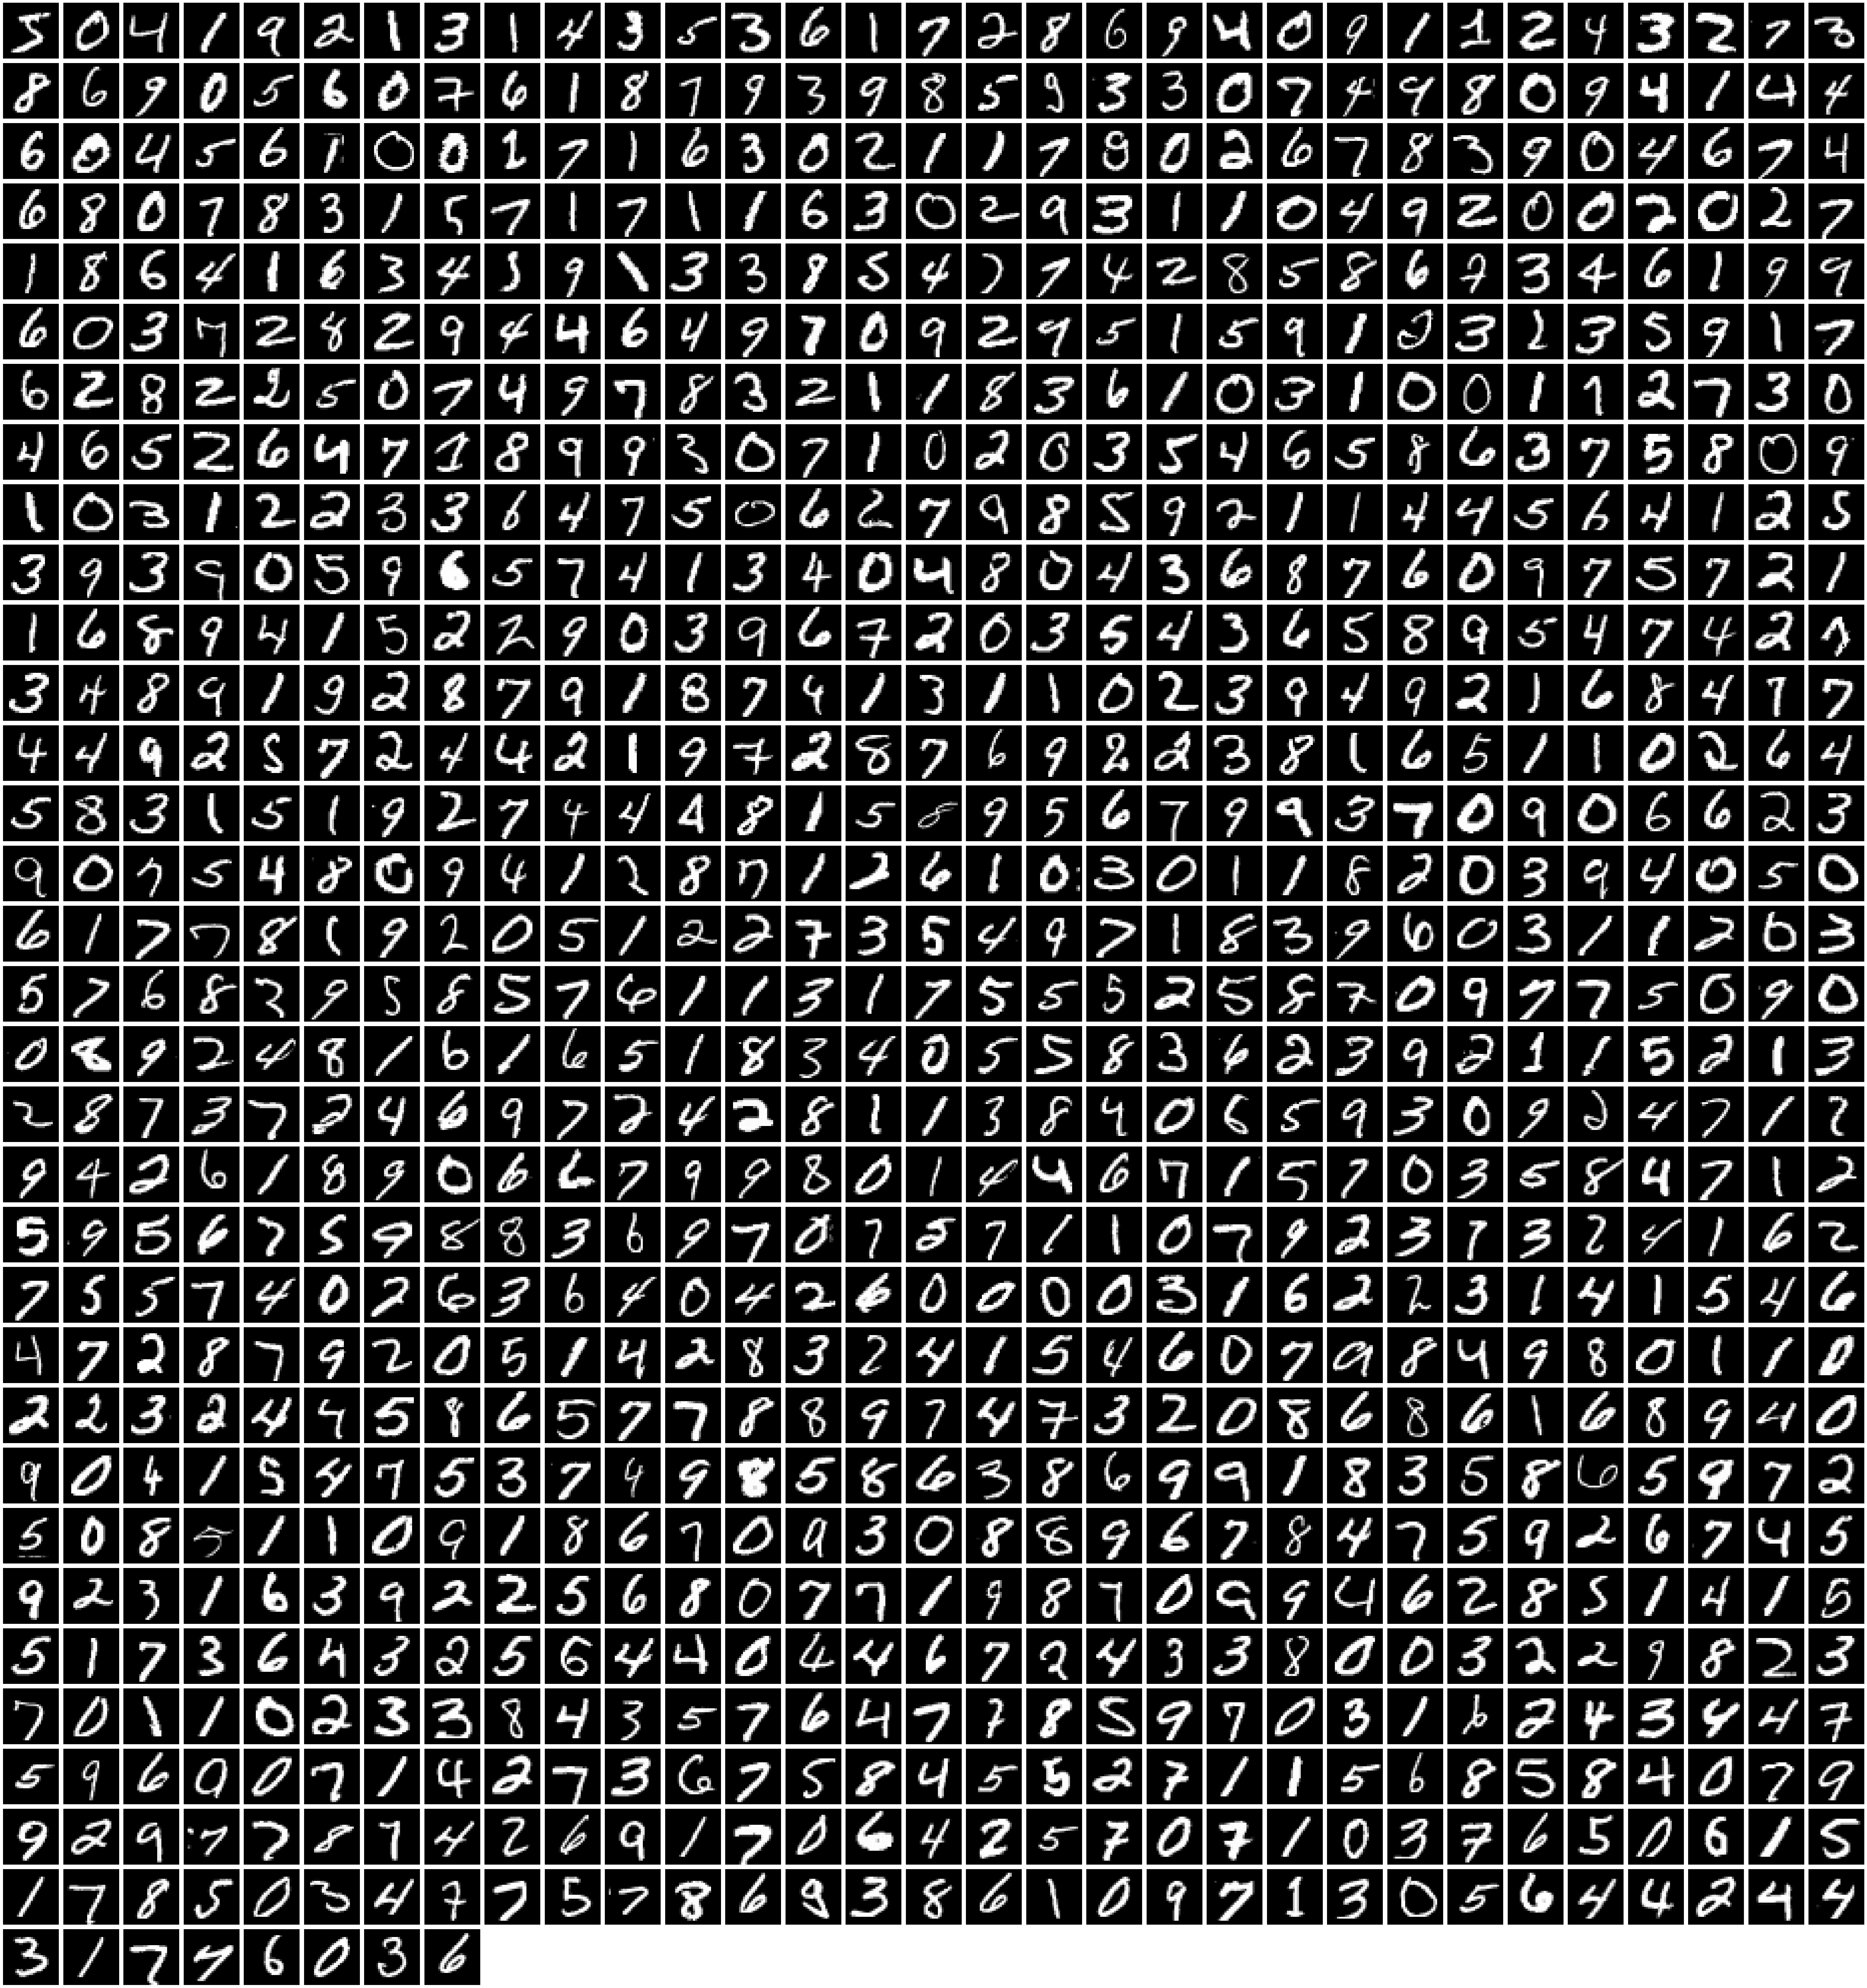

In [11]:
plot_mnist_images(X, bck_white = False)

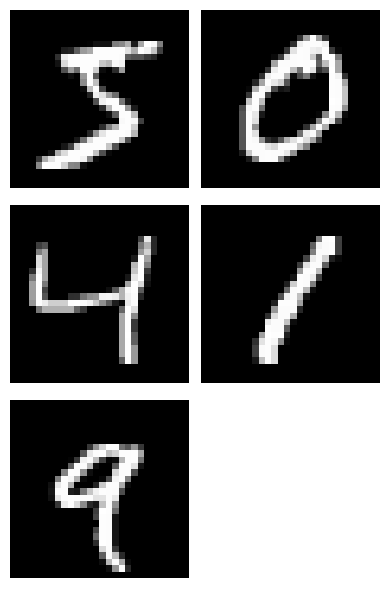

In [13]:
plot_mnist_images(X[0:5], bck_white = False)

In [16]:
y

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

### Ejercicio 2

Separa en train y test. Muestra el número de instancias para cada grupo

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 73)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 784)
(800,)
(200, 784)
(200,)


### Ejercicio 3

Entrena un clasificador basado en Random Forest. Haz la predicción sobre los 5 primeros elementos del dataset de train y comprueba visualmente cuánto ha acertado.

In [27]:
rnd_clf = RandomForestClassifier()

rnd_clf.fit(X_train, y_train)

pred_rf = rnd_clf.predict(X_train[0:5])

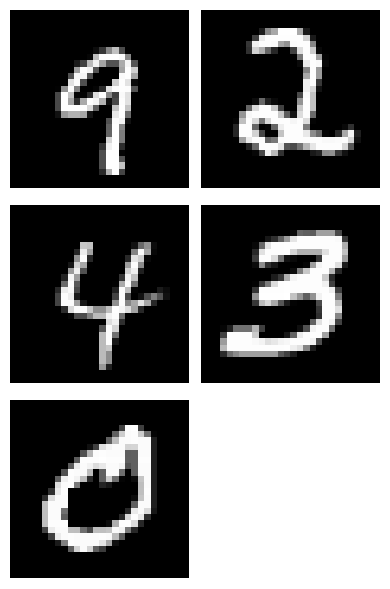

In [28]:
plot_mnist_images(X_train[0:5], bck_white = False)

In [29]:
print(pred_rf)

[9 2 4 3 0]


### Ejercicio 4

Pruébalo contra test y muestra su informe de clasificación

In [30]:
y_pred = rnd_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.83      0.96      0.89        26
           2       1.00      0.73      0.85        15
           3       0.86      0.86      0.86        22
           4       0.84      0.91      0.87        23
           5       1.00      0.78      0.88        18
           6       0.88      0.82      0.85        17
           7       0.73      0.89      0.80        18
           8       0.95      0.86      0.90        21
           9       0.74      0.74      0.74        19

    accuracy                           0.86       200
   macro avg       0.87      0.85      0.86       200
weighted avg       0.87      0.86      0.86       200



### Ejercicio 5

Obten la feature importance del modelo pero muéstrala como una imagen para que veamos que píxeles son más importantes (hay tantos coeficientes como píxeles, recuerda). PISTA: Igual puedes usar parte del código de la función anterior o todo.

<Axes: >

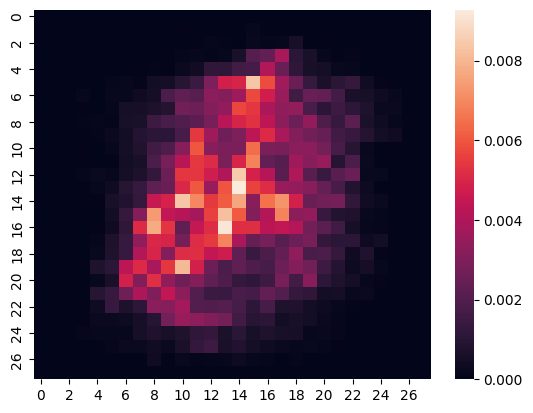

In [32]:
rnd_clf.feature_importances_
sns.heatmap(rnd_clf.feature_importances_.reshape(28,28))

### Ejercicio 6 

Entrena ahora un ensamblado basado en el Gradient Boosted Trees de sklearn. Muestra la predicción de los números en las posiciones 20 a 25 de train y su target.

### Ejercicio 7

Pruébalo contra test y muestra su informe de clasificación

### Ejercicio 8

Entrena ahora un ensamblado basado en XGBoost. Muestra la predicción de los números en las posiciones 50 a 55 de train y su target.

### Ejercicio 9

Pruébalo contra test y muestra su informe de clasificación

### Ejercicio 10

Entrena ahora un ensamblado basado en LightGBM. Muestra la predicción de los números en las posiciones 125 a 130 de train y su target.

### Ejercicio 11

Pruébalo contra test y muestra su informe de clasificación

### Ejercicio 12

Entrena ahora un ensamblado basado en CatBoost. Muestra la predicción de los números en las posiciones 305 a 310 de train y su target.

### Ejercicio 13

Pruébalo contra test y muestra su informe de clasificación

### Ejercicio 14

A la vista de los resultados, ¿con qué modelo te quedarías?